In [86]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
# from google.colab.patches import cv2_imshow
from tqdm import tqdm
import time

(2048, 1536, 3)


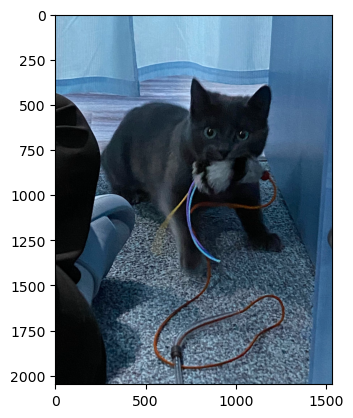

In [89]:

### CHRISTINE EXAMPLE ###
import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
import os.path as osp

img_dir = 'D:/woo/uw/Arnolds-Cat-Map-Image-Encryption/photos'
key = 20
resize_factor = 8

img_name = 'nori.jpg'

img_path = osp.join(img_dir, img_name)
img = cv2.imread(img_path) #(250, 250, 3)
img.shape

# img = cv2.resize(img, (32,32))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
imshow(img)

In [143]:
img_h, img_w, img_c = img.shape
# resize_h, resize_w = int(img_h/resize_factor), int(img_w/resize_factor)
resize_h, resize_w = 31, 31

def ArnoldCatTransform(img, num):
    h, w, c = img.shape
    img_arnold = np.zeros([h, w, c])
    for x in range(0, w):    
        for y in range(0, h):
            nx = (2*x+y) % w
            ny = (x+y) % h
            img_arnold[y][x] = img[(x+y) % h][(2*x+y) % w]
    return img_arnold

def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    img = cv2.resize(img, (resize_h, resize_w))
    for i in range (0, key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    imshow(img)
    return img

def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    img = cv2.resize(img, (resize_h, resize_w))
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in tqdm(range(key,decrypt_it)):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    imshow(img)
    return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0963892936706543


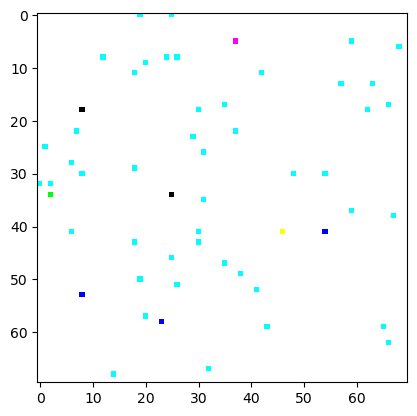

In [144]:
start = time.time()
ArnoldCatEncryptionIm = ArnoldCatEncryption(osp.join(img_dir, img_name), key)
end = time.time()
print(end - start)
imshow(ArnoldCatEncryptionIm)

D:/woo/uw/Arnolds-Cat-Map-Image-Encryption/photos\nori_ArnoldcatEnc.png


100%|██████████| 100/100 [00:00<00:00, 397.72it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.2631947994232178


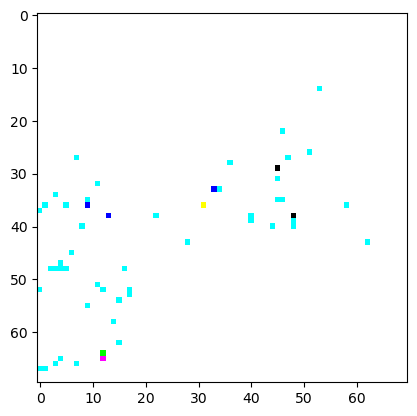

In [145]:
start = time.time()
encrypt_img_path = osp.join(img_dir, img_name.split('.')[0] + "_ArnoldcatEnc.png")
print(encrypt_img_path)
ArnoldCatDecryptionIm = ArnoldCatDecryption(encrypt_img_path, key)
end = time.time()
print(end - start)

In [14]:
image = "redlena"
ext = ".png"
key = 20
img = cv2.imread(image + ext)
img = cv2.resize(img, (250,250))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
name = "grayscale" + image + ext
cv2.imwrite(name, img)
cv2.imshow(img)
cv2.waitKey(1)
cv2.destroyAllWindows()

start = time.time()
ArnoldCatEncryptionIm = ArnoldCatEncryption(name, key)
end = time.time()
print(end - start)

start = time.time()
ArnoldCatDecryptionIm = ArnoldCatDecryption("grayscale" + image + "_ArnoldcatEnc.png", key)
end = time.time()
print(end - start)

cv2.imshow(ArnoldCatDecryptionIm)
cv2.waitKey(1)
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


Text(0.5, 1.0, 'Decrypted Image (key = 20)')

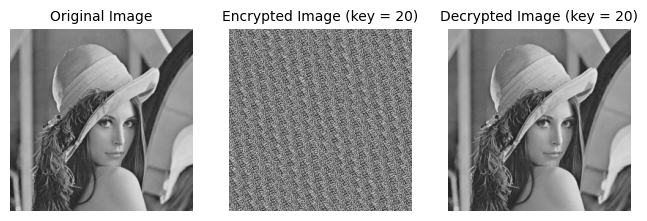

In [52]:
image1 = cv2.imread("grayscaleredlena.png")
image2 = cv2.imread("grayscaleredlena_ArnoldcatEnc.png")
image3 = cv2.imread("grayscaleredlena_ArnoldcatDec.png")

cv2.imwrite("encryptedcopy.png", image2)
ArnoldCatDecryptionIm = ArnoldCatDecryption("encryptedcopy.png", 10)
image4 = ArnoldCatDecryptionIm.copy()

rows = 1
columns = 3

fig = plt.figure(figsize=(8, 8))
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(image1)
plt.axis('off')
plt.title("Original Image", fontsize = 10)

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(image2)
plt.axis('off')
plt.title("Encrypted Image (key = 20)", fontsize = 10)

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(image3)
plt.axis('off')
plt.title("Decrypted Image (key = 20)", fontsize = 10)

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 4)

# # showing image
# plt.imshow(image4)
# plt.axis('off')
# plt.title("Decrypted with wrong key (key = 10)", fontsize = 10)

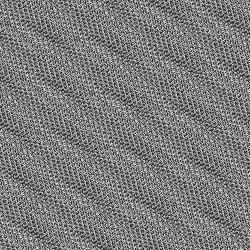

In [55]:
cv2_imshow(image4)